










# Statistics

## 1.1 Sales for the past week was the following amounts: [3505, 2400, 3027, 2798, 3700, 3250, 2689]. Without using library functions, what is the mean, variance, and standard deviation of of sales from last week? (for extra bonus points, write your own function that can calculate these two values for any sized list)

In [0]:
sales = [3505, 2400, 3027, 2798, 3700, 3250, 2689]

In [0]:
def list_mean(list):
  return sum(list)/len(list)

In [3]:
#Here the mean
list_mean(sales)

3052.714285714286

In [0]:
# Went back and changed this funtion to include length - 1 in order to fit with
#later questions
def list_variance(list):
  mean = sum(list)/len(list)
  numerator = 0
  for item in list:
    numerator = numerator + ((item - mean)**2)
  return numerator/(len(list)-1)

In [5]:
#Heres the variance
list_variance(sales)

214387.90476190473

In [0]:
def list_sdev(list):
  variance = list_variance(list)
  return variance**.5

In [7]:
#Heres the standard deviation
list_sdev(sales)

463.0204150595357

## 1.2 Find the covariance between last week's sales numbers and the number of customers that entered the store last week: [127, 80, 105, 92, 120, 115, 93] (you may use librray functions for calculating the covariance since we didn't specifically talk about its formula)

In [0]:
customers = [127, 80, 105, 92, 120, 115, 93]

In [9]:
import numpy as np
np.cov(sales, customers)

array([[214387.9047619 ,   7604.35714286],
       [  7604.35714286,    290.95238095]])

## 1.3 Find the standard deviation of customers who entered the store last week. Then, use the standard deviations of both sales and customers to standardize the covariance to find the correlation coefficient that summarizes the relationship between sales and customers. (You may use library functions to check your work.)

In [0]:
sd_sales = list_sdev(sales)
sd_customers = list_sdev(customers)
covariance = np.cov(sales, customers)[0][1]

In [11]:
#Im kinda weird about rounding errors to I decided to capture the raw output rather than copypaste
covariance/(sd_sales*sd_customers)

0.9628339778148909

In [12]:
np.corrcoef(sales,customers)

array([[1.        , 0.96283398],
       [0.96283398, 1.        ]])

## 1.4 Use pandas to import a cleaned version of the titanic dataset from the following link: [Titanic Dataset](https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_clean.csv)

## Calculate the variance-covariance matrix and correlation matrix for the titanic dataset's numeric columns. (you can encode some of the categorical variables and include them as a stretch goal if you finish early)

In [13]:
import pandas as pd
t_df = pd.read_csv('https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_clean.csv')
t_df.head()

,Unnamed: 0,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,has_cabin_number
0,1,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",1
1,2,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",1
2,3,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",1
3,4,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",1
4,5,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",1


In [0]:
# I misinterpreted the question at first, but I dont feel like deleting it either.
def cov_corr(a_list,b_list):
  df = pd.DataFrame({'a_list': a_list,'b_list': b_list}).dropna()
  covariance = np.cov(df['a_list'], df['b_list'])[0,1]
  denominator= (np.std(df['a_list'], ddof=1) * np.std(df['b_list'], ddof=1))
  corrcoef = covariance/denominator
  return print('covariance:', covariance, '\n', 'correlation coef:', corrcoef)

In [15]:
#Correlation matrix
t_df.corr()

,Unnamed: 0,pclass,survived,age,sibsp,parch,fare,body,has_cabin_number
Unnamed: 0,1.000000,0.897822,-0.293717,-0.296172,0.065594,0.003584,-0.481215,0.015558,-0.603727
pclass,0.897822,1.000000,-0.312469,-0.366370,0.060832,0.018322,-0.558629,-0.034642,-0.713857
survived,-0.293717,-0.312469,1.000000,-0.050199,-0.027825,0.082660,0.244265,NaN,0.302250
age,-0.296172,-0.366370,-0.050199,1.000000,-0.190747,-0.130872,0.171892,0.059059,0.271887
sibsp,0.065594,0.060832,-0.027825,-0.190747,1.000000,0.373587,0.160238,-0.099961,-0.009064
parch,0.003584,0.018322,0.082660,-0.130872,0.373587,1.000000,0.221539,0.051099,0.036806
fare,-0.481215,-0.558629,0.244265,0.171892,0.160238,0.221539,1.000000,-0.043110,0.507253
body,0.015558,-0.034642,NaN,0.059059,-0.099961,0.051099,-0.043110,1.000000,0.083796
has_cabin_number,-0.603727,-0.713857,0.302250,0.271887,-0.009064,0.036806,0.507253,0.083796,1.000000


In [16]:
#Covariance matrix
t_df.cov()

,Unnamed: 0,pclass,survived,age,sibsp,parch,fare,body,has_cabin_number
Unnamed: 0,143117.500000,284.357034,-53.967125,-1442.939812,25.828746,1.172783,-9410.735123,591.579132,-95.438885
pclass,284.357034,0.701969,-0.127248,-3.954605,0.053090,0.013287,-24.227788,-2.876653,-0.249992
survived,-53.967125,-0.127248,0.236250,-0.314343,-0.014088,0.034776,6.146023,0.000000,0.061406
age,-1442.939812,-3.954605,-0.314343,165.850021,-2.559806,-1.459378,114.416613,81.622922,1.463138
sibsp,25.828746,0.053090,-0.014088,-2.559806,1.085052,0.336833,8.641768,-8.708471,-0.003946
parch,1.172783,0.013287,0.034776,-1.459378,0.336833,0.749195,9.928031,4.237190,0.013316
fare,-9410.735123,-24.227788,6.146023,114.416613,8.641768,9.928031,2678.959738,-179.164684,10.976961
body,591.579132,-2.876653,0.000000,81.622922,-8.708471,4.237190,-179.164684,9544.688567,3.625689
has_cabin_number,-95.438885,-0.249992,0.061406,1.463138,-0.003946,0.013316,10.976961,3.625689,0.174613


# Orthogonality

## 2.1 Plot two vectors that are orthogonal to each other. What is a synonym for orthogonal?

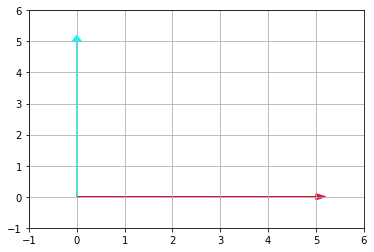

In [17]:
import matplotlib.pyplot as plt

vector_1 = [0,5]
vector_2 = [5,0]

fig, ax = plt.subplots()
ax.grid()

plt.xlim(-1,6)          
plt.ylim(-1,6)

plt.arrow(0,0, *vector_1, head_width= .2, head_length=.2, color='cyan')
plt.arrow(0,0, *vector_2, head_width= .2, head_length=.2, color='crimson')
plt.show()

In [0]:
# Orthoganal can be thought of as being "perpendicular" as in having a 90 degree
# angle.

## 2.2 Are the following vectors orthogonal? Why or why not?

\begin{align}
a = \begin{bmatrix} -5 \\ 3 \\ 7 \end{bmatrix}
\qquad
b = \begin{bmatrix} 6 \\ -8 \\ 2 \end{bmatrix}
\end{align}

In [0]:
a = [-5,3,7]
b = [6,-8,2]

In [20]:
np.dot(a,b)

-40

In [0]:
# A simple test for othogonality is to take the dot product. if the output is
# zero then they are orthogonal. These however, are not.

## 2.3 Compute the following values: What do these quantities have in common?

## What is $||c||^2$? 

## What is $c \cdot c$? 

## What is $c^{T}c$?

\begin{align}
c = \begin{bmatrix} 2 & -15 & 6 & 20 \end{bmatrix}
\end{align}

In [35]:
c = np.array([2,-15,6,20])
c_T = np.transpose([c])
print('||c||:', np.linalg.norm(c))
print('c ⋅ c:' , np.dot(c,c))
print('c^T * c:', (c_T*c))

||c||: 25.787593916455254
c ⋅ c: 665
c^T * c: [[   4  -30   12   40]
 [ -30  225  -90 -300]
 [  12  -90   36  120]
 [  40 -300  120  400]]


In [0]:
# No idea how to answer the second part of this question

# Unit Vectors

l;o;
;




## 3.1 Using Latex, write the following vectors as a linear combination of scalars and unit vectors:

\begin{align}
d = \begin{bmatrix} 7 \\ 12 \end{bmatrix}
\qquad
e = \begin{bmatrix} 2 \\ 11 \\ -8  \end{bmatrix}
\end{align}

 
\begin{align}
d = 7\begin{bmatrix} 1 \\ 0 \end{bmatrix} +12\begin{bmatrix} 0 \\ 1 \end{bmatrix}
\qquad
e = 2\begin{bmatrix} 1 \\ 0 \\ 0  \end{bmatrix} + 11\begin{bmatrix} 0 \\ 1 \\ 0  \end{bmatrix} + 8\begin{bmatrix} 0 \\ 0 \\ -1  \end{bmatrix}
\end{align}

## 3.2 Turn vector $f$ into a unit vector:

\begin{align}
f = \begin{bmatrix} 4 & 12 & 11 & 9 & 2 \end{bmatrix}
\end{align}

In [0]:
f = np.array([4,12,11,9,2])
f_scalar = np.linalg.norm(f)

In [28]:
f_unitvector = f/f_scalar
f_unitvector

array([0.20908335, 0.62725005, 0.57497921, 0.47043754, 0.10454167])

In [29]:
# Now to prove f_unitvector is a unit vector
np.linalg.norm(f_unitvector)

0.9999999999999999

# Linear Independence / Dependence 

## 4.1 Plot two vectors that are linearly dependent and two vectors that are linearly independent (bonus points if done in $\mathbb{R}^3$).

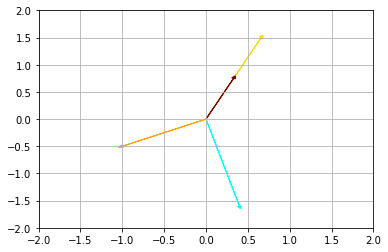

In [32]:
fig, ax = plt.subplots()
vector_a = [.66,1.5]
vector_b = [.33,.75]
vector_c = [-1,-.5]
vector_d = [.4,-1.6]


ax.grid()

plt.xlim(-2,2)          
plt.ylim(-2,2)

plt.arrow(0,0, *vector_a, head_width= .05, head_length=.05, color='gold')
plt.arrow(0,0, *vector_b, head_width= .05, head_length=.05, color='maroon')
plt.arrow(0,0, *vector_c, head_width= .05, head_length=.05, color='orange')
plt.arrow(0,0, *vector_d, head_width= .05, head_length=.05, color='aqua')
plt.show()

# Span

## 5.1 What is the span of the following vectors?

\begin{align}
g = \begin{bmatrix} 1 & 2 \end{bmatrix}
\qquad
h = \begin{bmatrix} 4 & 8 \end{bmatrix}
\end{align}

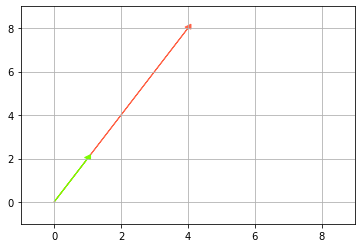

In [37]:
fig, ax = plt.subplots()
g = [1,2]
h= [4,8]

ax.grid()

plt.xlim(-1,9)          
plt.ylim(-1,9)

plt.arrow(0,0, *h, head_width= .2, head_length=.2, color='tomato')
plt.arrow(0,0, *g, head_width= .2, head_length=.2, color='lawngreen')
plt.show()

In [0]:
# These vectors can only span one dimension or R^1

## 5.2 What is the span of $\{l, m, n\}$?

\begin{align}
l = \begin{bmatrix} 1 & 2 & 3 \end{bmatrix}
\qquad
m = \begin{bmatrix} -1 & 0 & 7 \end{bmatrix}
\qquad
n = \begin{bmatrix} 4 & 8  & 2\end{bmatrix}
\end{align}

In [0]:
# Im gonna go ahead and risk not plotting this with matplotlibs janky 3d graphing
# tool and just say that with three independent 3D vectors, the span should be R^3 

# Basis

## 6.1 Graph two vectors that form a basis for $\mathbb{R}^2$



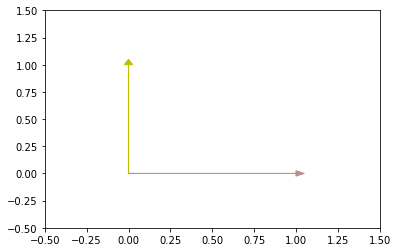

In [41]:
fig, ax = plt.subplots()

#ax.grid()

plt.xlim(-.5,1.5)          
plt.ylim(-.5,1.5)

plt.arrow(0,0,0,1, head_width= .05, head_length=.05, color='y')
plt.arrow(0,0,1,0, head_width= .05, head_length=.05, color='rosybrown')
plt.show()

## 6.2 What does it mean to form a basis?

The basis is a set of independant vectors that span a vector space

# Rank

## 7.1 What is the Rank of P?

\begin{align}
P = \begin{bmatrix} 
1 & 2 & 3 \\
 -1 & 0 & 7 \\
4 & 8  & 2
\end{bmatrix}
\end{align}

In [42]:
P = np.array([[1,2,3],[-1,0,7],[4,8,2]])
P

array([[ 1,  2,  3],
       [-1,  0,  7],
       [ 4,  8,  2]])

In [43]:
np.linalg.matrix_rank(P)

3

## 7.2 What does the rank of a matrix tell us?

*Rank tells us how many independant vectors exist within the matrix*

# Linear Projections

## 8.1 Line $L$ is formed by all of the vectors that can be created by scaling vector $v$ 
\begin{align}
v = \begin{bmatrix} 1 & 3 \end{bmatrix}
\end{align}

\begin{align}
w = \begin{bmatrix} -1 & 2 \end{bmatrix}
\end{align}

## find $proj_{L}(w)$

## graph your projected vector to check your work (make sure your axis are square/even)

# Stretch Goal

## For vectors that begin at the origin, the coordinates of where the vector ends can be interpreted as regular data points. (See 3Blue1Brown videos about Spans, Basis, etc.)

## Write a function that can calculate the linear projection of each point (x,y) (vector) onto the line y=x. run the function and plot the original points in blue and the new projected points on the line y=x in red. 

## For extra points plot the orthogonal vectors as a dashed line from the original blue points to the projected red points.

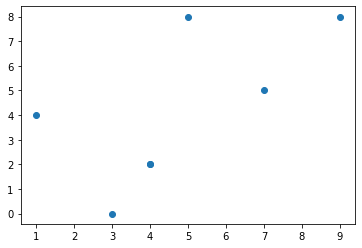

In [24]:
import pandas as pd
import matplotlib.pyplot as plt

# Creating a dataframe for you to work with -Feel free to not use the dataframe if you don't want to.
x_values = [1, 4, 7, 3, 9, 4, 5 ]
y_values = [4, 2, 5, 0, 8, 2, 8]

data = {"x": x_values, "y": y_values}

df = pd.DataFrame(data)

df.head()

plt.scatter(df.x, df.y)
plt.show()